# Librerias

In [4]:
#Analisis y exploracion de los datos
import numpy as np 
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0)
import seaborn as sns
import math

#preprocesamiento
import multiprocessing
from sklearn.experimental import enable_iterative_imputer
#from sklearn.impute import SimpleImputer
from sklearn.impute import IterativeImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
#from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
#from sklearn.compose import make_column_selector
from sklearn.model_selection import train_test_split
#import random
#from itertools import product

#Modelos y entrenamiento
from sklearn.model_selection import RandomizedSearchCV, RepeatedKFold
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

#Evaluacion
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# Analisis Exploratorio

In [5]:
#Carga de los datos limpios y observando la cantidad de filas y columnas
data_clean = pd.read_csv("C:/Users/win10 uefi/Documents/Proyecto_PrediccionCasas/clean_house.csv")
data_clean

index referencia                                     titulo_anuncio  \
0         0     E457CA                En venta casa de Lujo en Las Palmas   
1         1     Q67923                        CASA EN VENTA EN LAS PALMAS   
2         2     WC49A9                              CASA EN VENTA, IRPAVI   
3         3     Z7FD7E                Casa en venta sobre Av. Canal Isuto   
4         4     OF956B  casa a estrenar, 4 dormitorios, Condominio Los...   
...     ...        ...                                                ...   
1003   1043      6219C                             Casa en Venta - La Paz   
1004   1044      17E58  Urbanización San Jorge, haz tu reserva ya con ...   
1005   1046      A69AD  Casa Condominio Dalí, 3 dorm.,a/c, área social...   
1006   1047      7BC18                                      Casa equipada   
1007   1048      cE423      Casa zona URUBO trejo 1.100 Mts2 135.000 $us.   

           estado_casa departamento  \
0     Excelente estado   Santa Cruz   
1     Excelente estado   Santa Cruz   
2          Buen estado       La Paz   
3     Excelente estado   Santa Cruz   
4           A estrenar   Santa Cruz   
...                ...          ...   
1003  Excelente estado       La Paz   
1004        A estrenar   Santa Cruz   
1005  Excelente estado   Santa Cruz   
1006  Excelente estado   Santa Cruz   
1007       Buen estado   Santa Cruz   

                                              ubicacion  nro_habitaciones  \
0                    Las Palmas_ Las palmas_ Santa Cruz               4.0   
1     ENTRE 3ER Y 4TO ANILLO C/ BAHIA CACERES Y CAPA...               4.0   
2                     CALLE 18 Y OVANDO_ Irpavi_ La Paz               3.0   
3     sobre Av. Canal Isuto entre 4to y 5to anillo_ ...               5.0   
4           condominio Los parques 3_ Urubó_ Santa Cruz               4.0   
...                                                 ...               ...   
1003  Calle 2 de Febrero_ entre calles 6 y 7 de Mall...               3.0   
1004  avenida G-77 y Beni a la altura del noveno ani...               3.0   
1005  casa nro 35 Condominio Dalí. cel *** _ Remanso...               3.0   
1006                                    Sur_ Santa Cruz               4.0   
1007                                  Urubó_ Santa Cruz               3.0   

      nro_baño  m2_terreno  nro_plantas  m2_edificados  nro_garajes  \
0            3       600.0          1.0          650.0          2.0   
1            3       726.0          1.0            NaN          2.0   
2            3       643.0          1.0          643.0          3.0   
3            2       194.0          1.0          194.0          NaN   
4            3       158.0          2.0          158.0          1.0   
...        ...         ...          ...            ...          ...   
1003         3       178.0          2.0          300.0          2.0   
1004         2       258.0          1.0          110.0          2.0   
1005         3       250.0          1.0          150.0          2.0   
1006         3       300.0          1.0          165.0          NaN   
1007         2      1100.0          NaN          300.0          NaN   

      precio_venta  antiguedad  
0         850000.0         NaN  
1         685000.0         NaN  
2         449000.0         NaN  
3         139000.0         NaN  
4         149000.0         NaN  
...            ...         ...  
1003      190000.0        10.0  
1004       67500.0         5.0  
1005      115000.0         9.0  
1006      108000.0         NaN  
1007      135000.0         NaN  

[1008 rows x 14 columns]

## Analisis Univariado

In [6]:
#Resumen de los datos
data_clean.info()

#Resumen general de los datos numericos
print()
#data_clean.describe(include='all')
data_clean.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1008 entries, 0 to 1007
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             1008 non-null   int64  
 1   referencia        1008 non-null   object 
 2   titulo_anuncio    1008 non-null   object 
 3   estado_casa       1008 non-null   object 
 4   departamento      1008 non-null   object 
 5   ubicacion         1008 non-null   object 
 6   nro_habitaciones  992 non-null    float64
 7   nro_baño          1008 non-null   int64  
 8   m2_terreno        1005 non-null   float64
 9   nro_plantas       963 non-null    float64
 10  m2_edificados     1002 non-null   float64
 11  nro_garajes       945 non-null    float64
 12  precio_venta      1000 non-null   float64
 13  antiguedad        676 non-null    float64
dtypes: float64(7), int64(2), object(5)
memory usage: 110.4+ KB



index  nro_habitaciones     nro_baño     m2_terreno  nro_plantas  \
count  1008.000000        992.000000  1008.000000    1005.000000   963.000000   
mean    511.440476          3.566532     2.640873    1551.180100     1.662513   
std     299.450063          0.852141     0.648883   11753.766159     0.634520   
min       0.000000          1.000000     1.000000       2.000000     1.000000   
25%     253.750000          3.000000     2.000000     204.000000     1.000000   
50%     506.500000          3.000000     3.000000     300.000000     2.000000   
75%     761.250000          4.000000     3.000000     450.000000     2.000000   
max    1048.000000          5.000000     8.000000  292500.000000     3.000000   

       m2_edificados  nro_garajes  precio_venta  antiguedad  
count    1002.000000   945.000000  1.000000e+03  676.000000  
mean      977.304391     2.131217  3.641188e+05    7.155325  
std     11452.504971     0.718792  3.907112e+06    7.607082  
min         1.000000     1.000000  1.450000e+02    0.000000  
25%       143.000000     2.000000  9.500000e+04    2.000000  
50%       208.000000     2.000000  1.490000e+05    5.000000  
75%       360.000000     3.000000  2.712500e+05    9.000000  
max    309500.000000     8.000000  1.234568e+08   53.000000

In [7]:
def var_nums(dfx):
    numeric_data = dfx.select_dtypes(include=[np.number])
    return numeric_data
def var_cats(dfx):
    cat_data = dfx.select_dtypes(include=['object'])
    return cat_data

In [8]:
#Cantidad de tipos de datos
print(data_clean.dtypes.value_counts(),"\n")

#Cantidad de variables numericas y categoricas en los datos
numeric_data=var_nums(data_clean)
cat_data=var_cats(data_clean)
print ("Existen",numeric_data.shape[1],"variables numericas y",cat_data.shape[1] ,"variables categoricas")

float64    7
object     5
int64      2
dtype: int64 

Existen 9 variables numericas y 5 variables categoricas


m2_terreno            3
m2_edificados         6
precio_venta          8
nro_habitaciones     16
nro_plantas          45
nro_garajes          63
antiguedad          332
dtype: int64


  0%|          | 0/174 [00:00<?, ?it/s]

c:\ProgramData\Anaconda3\envs\l1mk\lib\site-packages\dask\core.py:119: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))



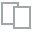
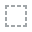
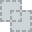
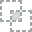
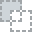
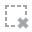
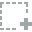
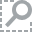
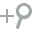
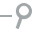
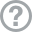
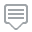
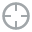
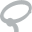
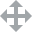
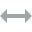
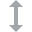
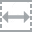
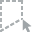
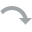
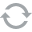
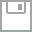
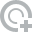
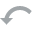
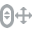
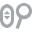
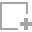
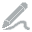
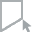
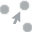
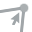
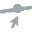

In [9]:
#Cantidad de datos faltantes

faltantes = data_clean.isnull().sum()
faltantes=faltantes[faltantes>0]
faltantes.sort_values(inplace=True)
print(faltantes)

from dataprep.eda import plot_missing
plot_missing(data_clean)

c:\ProgramData\Anaconda3\envs\l1mk\lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
c:\ProgramData\Anaconda3\envs\l1mk\lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
c:\Program

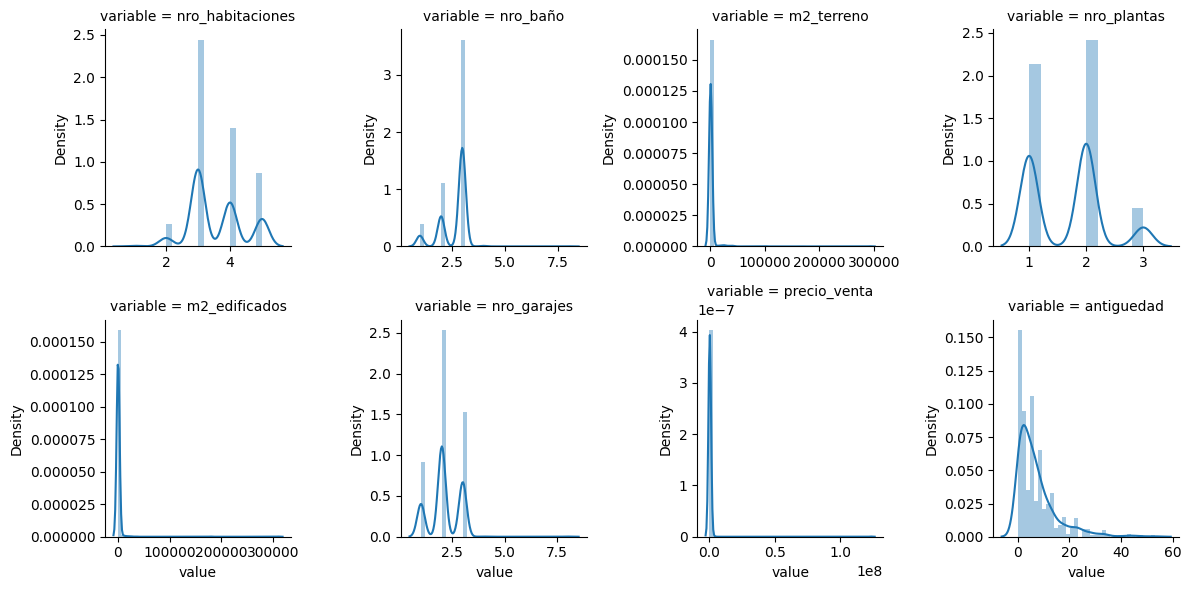

In [10]:
#Verificamos la distribucion de las variable numericas
num = [f for f in data_clean.columns if data_clean.dtypes[f] != 'object']
num.remove('index')
nd = pd.melt(data_clean, value_vars = num)
n1 = sns.FacetGrid (nd, col='variable', col_wrap=4, sharex=False, sharey = False)
n1 = n1.map(sns.distplot, 'value')
n1

C:\Users\win10 uefi\AppData\Local\Temp\ipykernel_3348\3489525206.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(
c:\ProgramData\Anaconda3\envs\l1mk\lib\site-packages\seaborn\distributions.py:2511: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)
C:\Users\win10 uefi\AppData\Local\Temp\ipykernel_3348\3489525206.py:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-le

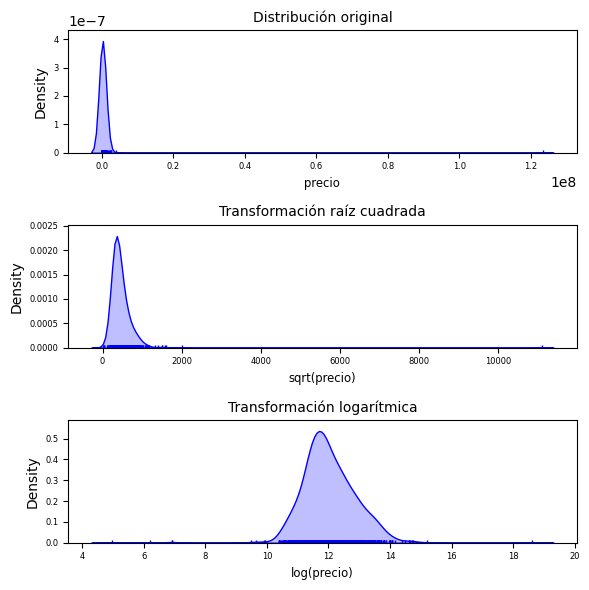

In [11]:
#Analizando la variable respuesta aplicando logaritmo y raiz cuadrado para visualizar mejor su distribucion

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(6, 6))
sns.distplot(
    data_clean['precio_venta'],
    hist    = False,
    rug     = True,
    color   = "blue",
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = axes[0]
)
axes[0].set_title("Distribución original", fontsize = 'medium')
axes[0].set_xlabel('precio', fontsize='small') 
axes[0].tick_params(labelsize = 6)

sns.distplot(
    np.sqrt(data_clean.precio_venta),
    hist    = False,
    rug     = True,
    color   = "blue",
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = axes[1]
)
axes[1].set_title("Transformación raíz cuadrada", fontsize = 'medium')
axes[1].set_xlabel('sqrt(precio)', fontsize='small') 
axes[1].tick_params(labelsize = 6)

sns.distplot(
    np.log(data_clean.precio_venta),
    hist    = False,
    rug     = True,
    color   = "blue",
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = axes[2]
)
axes[2].set_title("Transformación logarítmica", fontsize = 'medium')
axes[2].set_xlabel('log(precio)', fontsize='small') 
axes[2].tick_params(labelsize = 6)

fig.tight_layout()

c:\ProgramData\Anaconda3\envs\l1mk\lib\site-packages\pandas\core\internals\blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
c:\ProgramData\Anaconda3\envs\l1mk\lib\site-packages\pandas\core\internals\blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
c:\ProgramData\Anaconda3\envs\l1mk\lib\site-packages\pandas\core\internals\blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
c:\ProgramData\Anaconda3\envs\l1mk\lib\site-packages\pandas\core\internals\blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
c:\ProgramData\Anaconda3\envs\l1mk\lib\site-packages\pandas\core\internals\blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
c:\ProgramData\Anaconda3\envs\l1mk\lib\site-packages\pandas\core\internals\blocks.py:351: RuntimeWarning:

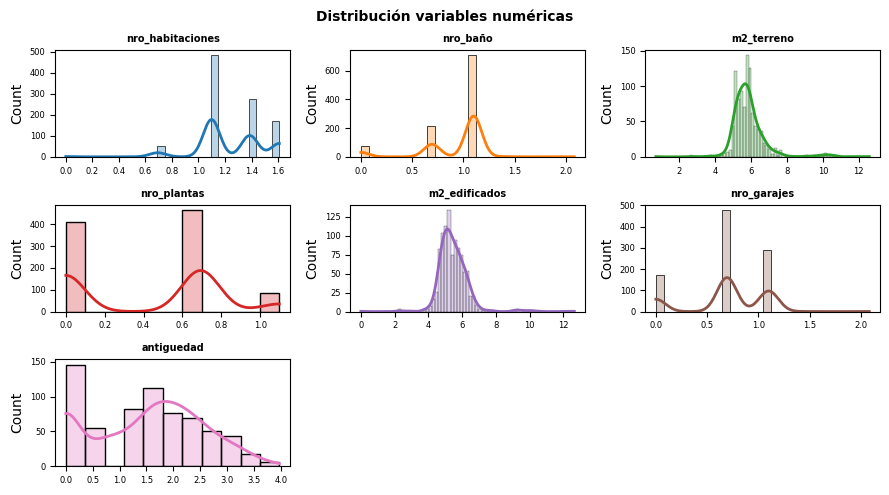

In [12]:
#Aplicando logaritmo a las otras variables numericas

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(9, 5))
axes = axes.flat
columns_numeric = data_clean.select_dtypes(include=['float64', 'int']).columns
columns_numeric = columns_numeric.drop('precio_venta')
columns_numeric = columns_numeric.drop('index')

for i, colum in enumerate(columns_numeric):
    sns.histplot(
        data    = np.log(numeric_data),
        x       = colum,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 7, fontweight = "bold")
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")

# Se eliminan los axes vacíos
for i in [7,8]:
    fig.delaxes(axes[i])  

fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución variables numéricas', fontsize = 10, fontweight = "bold");

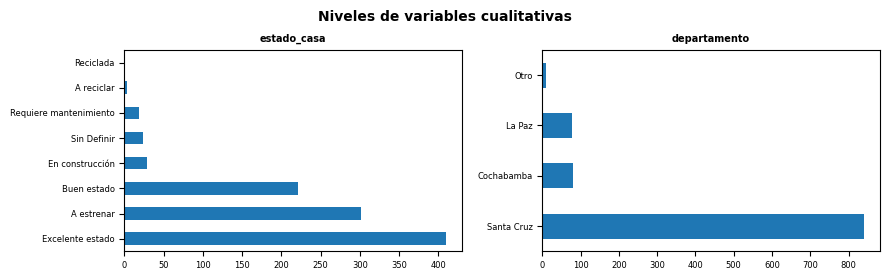

In [13]:
df_util = data_clean.copy()
df_util=df_util.drop(['index','referencia','titulo_anuncio','ubicacion'],axis=1)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(9, 5))
axes = axes.flat
columnas_object = df_util.select_dtypes(include=['object']).columns

for i, colum in enumerate(columnas_object):
    data_clean[colum].value_counts().plot.barh(ax = axes[i])
    axes[i].set_title(colum, fontsize = 7, fontweight = "bold")
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")

# Se eliminan los axes vacíos
for i in [2, 3]:
    fig.delaxes(axes[i])
    
fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Niveles de variables cualitativas',
             fontsize = 10, fontweight = "bold");

In [14]:
print("Variable: estado de la casa")
print(data_clean['estado_casa'].value_counts(),"\n")
print("Variable: Departamento")
print(data_clean['departamento'].value_counts())


Variable: estado de la casa
Excelente estado          410
A estrenar                302
Buen estado               221
En construcción            29
Sin Definir                23
Requiere mantenimiento     19
A reciclar                  3
Reciclada                   1
Name: estado_casa, dtype: int64 

Variable: Departamento
Santa Cruz    840
Cochabamba     80
La Paz         79
Otro            9
Name: departamento, dtype: int64


## Analisis Bivariado


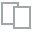
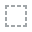
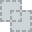
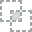
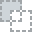
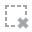
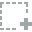
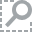
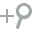
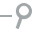
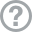
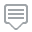
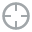
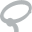
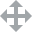
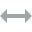
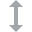
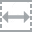
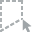
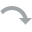
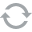
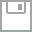
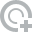
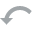
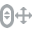
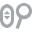
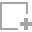
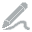
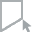
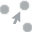
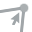
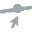

In [15]:
#Analisis de correlacion entre variables
from dataprep.eda import plot_correlation
var_num=numeric_data.drop(columns=['index'])
plot_correlation(var_num)
#plot_correlation(np.log(numeric_data))

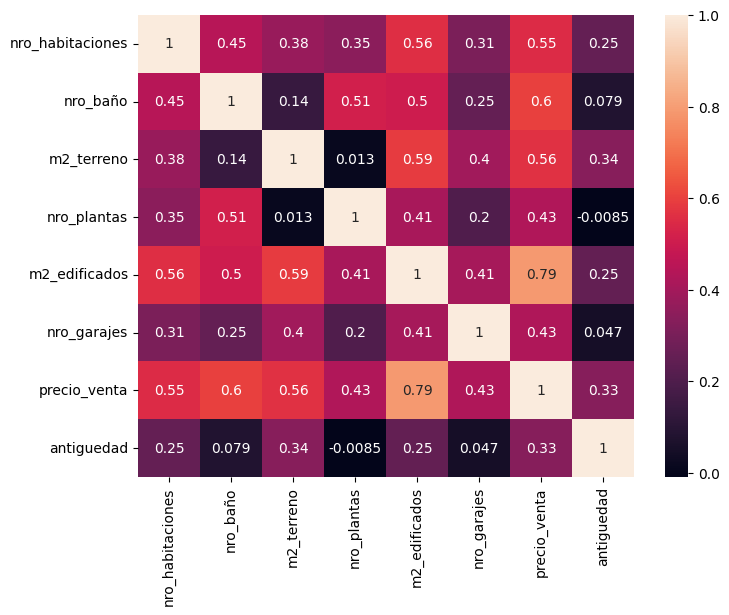

In [16]:
var_num=numeric_data.drop(columns=['index'])
#var_num = var_num.reset_index()
corr_df = var_num.corr(method='spearman')

plt.figure(figsize=(8, 6))
sns.heatmap(corr_df, annot=True)
plt.show()

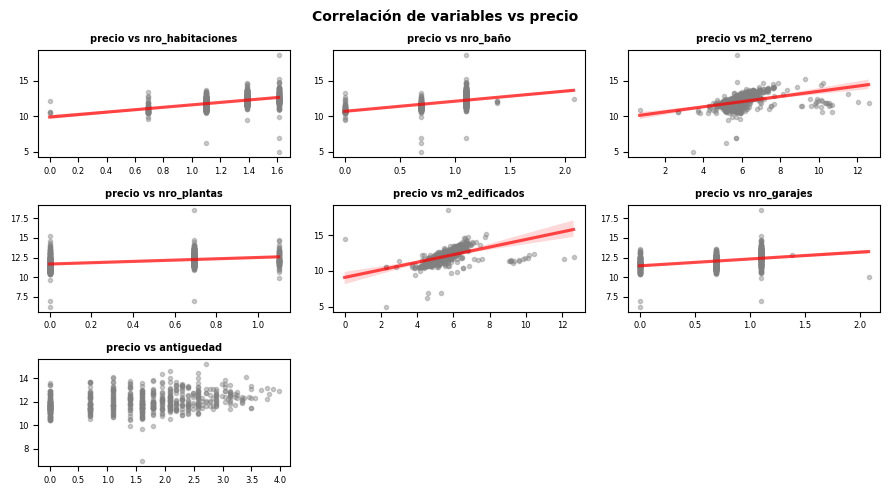

In [73]:
#Verificando correlacion entre las variables numericas predictoras con el precio_venta aplicando logaritmos

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(9, 5))
axes = axes.flat

for i, colum in enumerate(columns_numeric):
    sns.regplot(
        x           = np.log(numeric_data[colum]),
        y           = np.log(numeric_data['precio_venta']),
        #x           = numeric_data[colum],
        #y           = numeric_data['precio_venta'],
        color       = "gray",
        marker      = '.',
        scatter_kws = {"alpha":0.4},
        line_kws    = {"color":"r","alpha":0.7},
        ax          = axes[i]
    )
    axes[i].set_title(f"precio vs {colum}", fontsize = 7, fontweight = "bold")
    #axes[i].ticklabel_format(style='sci', scilimits=(-4,4), axis='both')
    axes[i].yaxis.set_major_formatter(ticker.EngFormatter())
    #axes[i].xaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

# Se eliminan los axes vacíos
for i in [7,8]:
    fig.delaxes(axes[i])
    
fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Correlación de variables vs precio', fontsize = 10, fontweight = "bold");

# Preprocesamiento

## Eliminacion de variables

In [18]:
#Eliminar columnas irrelevantes para los modelos
df1 =data_clean.copy()
df1 = data_clean.drop(columns=['index','referencia', 'titulo_anuncio', 'ubicacion'])
df1

estado_casa departamento  nro_habitaciones  nro_baño  m2_terreno  \
0     Excelente estado   Santa Cruz               4.0         3       600.0   
1     Excelente estado   Santa Cruz               4.0         3       726.0   
2          Buen estado       La Paz               3.0         3       643.0   
3     Excelente estado   Santa Cruz               5.0         2       194.0   
4           A estrenar   Santa Cruz               4.0         3       158.0   
...                ...          ...               ...       ...         ...   
1003  Excelente estado       La Paz               3.0         3       178.0   
1004        A estrenar   Santa Cruz               3.0         2       258.0   
1005  Excelente estado   Santa Cruz               3.0         3       250.0   
1006  Excelente estado   Santa Cruz               4.0         3       300.0   
1007       Buen estado   Santa Cruz               3.0         2      1100.0   

      nro_plantas  m2_edificados  nro_garajes  precio_venta  antiguedad  
0             1.0          650.0          2.0      850000.0         NaN  
1             1.0            NaN          2.0      685000.0         NaN  
2             1.0          643.0          3.0      449000.0         NaN  
3             1.0          194.0          NaN      139000.0         NaN  
4             2.0          158.0          1.0      149000.0         NaN  
...           ...            ...          ...           ...         ...  
1003          2.0          300.0          2.0      190000.0        10.0  
1004          1.0          110.0          2.0       67500.0         5.0  
1005          1.0          150.0          2.0      115000.0         9.0  
1006          1.0          165.0          NaN      108000.0         NaN  
1007          NaN          300.0          NaN      135000.0         NaN  

[1008 rows x 10 columns]

In [19]:
#Eliminacion de la categoria "otro" en la variable departamento
df1 = df1[~(df1.departamento.str.contains("Otro"))]
print(df1.groupby(['departamento'])['departamento'].count())
print("Cantidad de datos:",df1.shape[0])

departamento
Cochabamba     80
La Paz         79
Santa Cruz    840
Name: departamento, dtype: int64
Cantidad de datos: 999


In [ ]:
#combinar categorias

## Analisis de valores atipicos

c:\ProgramData\Anaconda3\envs\l1mk\lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


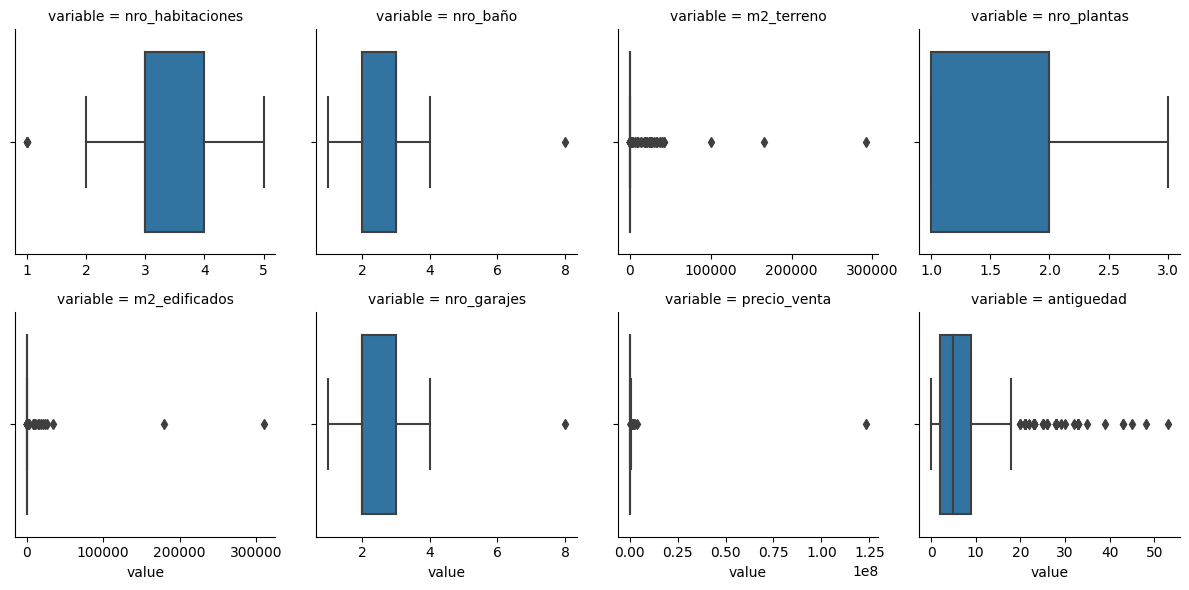

In [20]:
#Creamos funcion graficadora para realizar boxsplot a partir de un dataframe
def boxsplotsCasas(dfx):
    nd = pd.melt(dfx, value_vars = num)
    bp = sns.FacetGrid (nd, col='variable', col_wrap=4, sharex=False, sharey = False)
    bp = bp.map(sns.boxplot, 'value')
    return bp
#Graficamos los boxsplots la representacion de los datos y dispersion con respecto a las medidas de tendencia central
boxsplotsCasas(df1)

In [21]:
#funcion para determinar outliers
def var_outliers(df_numx):
    for i in range(len(df_numx.columns)):
        Q1 = np.nanpercentile(df_numx[df_numx.columns[i]], 25,method='midpoint')
        Q3 = np.nanpercentile(df_numx[df_numx.columns[i]], 75,method = 'midpoint')
        #IQR= iqr(data_clean['precio_venta'],nan_policy='omit',interpolation='midpoint')
        IQR = Q3 - Q1
        BS =(Q3+1.5*IQR)
        BI =(Q1-1.5*IQR)
        #print('Variable:',df_numx.columns[i],'; su Q1 es:',Q1,'; su Q3 es:',Q3,'; el rango intercuartil es:',IQR)
        var_outlier=(df_numx[df_numx.columns[i]]<BI) | (df_numx[df_numx.columns[i]]>BS)
        print(df_numx.columns[i], 'tiene', var_outlier[var_outlier==True].count(),'dato(s) atipico(s)',
          ';rango entre:',BI, 'y',BS,
          '; porcentaje:',round((var_outlier[var_outlier==True].count())/(df_numx[df_numx.columns[i]].count())*100,2))
    

In [22]:
#Verificamos la cantidad de outliers que hay en las variables numericas
var_outliers(var_num)

nro_habitaciones tiene 4 dato(s) atipico(s) ;rango entre: 1.5 y 5.5 ; porcentaje: 0.4
nro_baño tiene 1 dato(s) atipico(s) ;rango entre: 0.5 y 4.5 ; porcentaje: 0.1
m2_terreno tiene 96 dato(s) atipico(s) ;rango entre: -165.0 y 819.0 ; porcentaje: 9.55
nro_plantas tiene 0 dato(s) atipico(s) ;rango entre: -0.5 y 3.5 ; porcentaje: 0.0
m2_edificados tiene 60 dato(s) atipico(s) ;rango entre: -182.5 y 685.5 ; porcentaje: 5.99
nro_garajes tiene 1 dato(s) atipico(s) ;rango entre: 0.5 y 4.5 ; porcentaje: 0.11
precio_venta tiene 96 dato(s) atipico(s) ;rango entre: -171250.0 y 538750.0 ; porcentaje: 9.6
antiguedad tiene 51 dato(s) atipico(s) ;rango entre: -8.5 y 19.5 ; porcentaje: 7.54


In [23]:
#Viendo la cantidad de niveles en las variables con pocos niveles
var_nivl = ['nro_garajes','nro_plantas','nro_habitaciones','nro_baño']
for i in range(len(var_nivl)):
    print(var_num[var_nivl[i]].value_counts(),'\n')

2.0    479
3.0    290
1.0    174
4.0      1
8.0      1
Name: nro_garajes, dtype: int64 

2.0    466
1.0    411
3.0     86
Name: nro_plantas, dtype: int64 

3.0    485
4.0    277
5.0    173
2.0     53
1.0      4
Name: nro_habitaciones, dtype: int64 

3    709
2    217
1     77
4      4
8      1
Name: nro_baño, dtype: int64 



In [24]:
#Elimnando outliers de las variables con pocos valores
df2=df1.copy()
varnum_outliers1=(df2['nro_garajes']>3) | (df2['nro_baño']>3) | (df2['nro_habitaciones']==1)
df3=df2[varnum_outliers1==False]
df3.shape

(988, 10)

In [25]:
#Elimnando outliers de las variables m2_terreno,m2_edificados y precio_venta
#Se aplica un 4to nivel de limites intercuartil
df4=df3.copy()
#varnum_outliers2=(df3['m2_terreno']>569) | (df3['m2_edificados']>419) | (df3['precio_venta']>315500)
varnum_outliers2=(df3['m2_terreno']>819) | (df3['m2_edificados']>685.5) | (df3['precio_venta']>538750)
df4=df3[varnum_outliers2==False]
df4.shape

(830, 10)

In [26]:
#Verificamos la cantidad de outliers y su porcentaje
var_numx=var_nums(df4)
var_outliers(var_numx)

nro_habitaciones tiene 0 dato(s) atipico(s) ;rango entre: 1.5 y 5.5 ; porcentaje: 0.0
nro_baño tiene 0 dato(s) atipico(s) ;rango entre: 0.5 y 4.5 ; porcentaje: 0.0
m2_terreno tiene 30 dato(s) atipico(s) ;rango entre: -69.0 y 635.0 ; porcentaje: 3.63
nro_plantas tiene 0 dato(s) atipico(s) ;rango entre: -0.5 y 3.5 ; porcentaje: 0.0
m2_edificados tiene 22 dato(s) atipico(s) ;rango entre: -91.5 y 512.5 ; porcentaje: 2.66
nro_garajes tiene 334 dato(s) atipico(s) ;rango entre: 2.0 y 2.0 ; porcentaje: 43.15
precio_venta tiene 30 dato(s) atipico(s) ;rango entre: -112500.0 y 427500.0 ; porcentaje: 3.64
antiguedad tiene 31 dato(s) atipico(s) ;rango entre: -11.0 y 21.0 ; porcentaje: 5.44


In [27]:
#Cambiando valores en los outliers
#Creamos una funcion que reemplaze los outliers con el valor máximo (media + 2 sigmas).
def val_ct(colx):
    media_x = (colx).mean()
    std_x = (colx).std()*2
    res = round((media_x+std_x),2)
    return  res

In [28]:
"""
#reemplazamos los outliers y revisamos los nuevos cambios
df5 = df4.copy()
df5.loc[(df5.antiguedad>18.5),'antiguedad']=val_ct(df5['antiguedad'])
df5.loc[(df5.m2_terreno>542.5),'m2_terreno']=val_ct(df5['m2_terreno'])
df5.loc[(df5.m2_edificados>392.5),'m2_edificados']=val_ct(df5['m2_edificados'])
df5.loc[(df5.precio_venta>294500.0),'precio_venta']=val_ct(df5['precio_venta'])
var_numx1=var_nums(df5)
print(df5.shape)
var_outliers(var_numx1)
"""

"\n#reemplazamos los outliers y revisamos los nuevos cambios\ndf5 = df4.copy()\ndf5.loc[(df5.antiguedad>18.5),'antiguedad']=val_ct(df5['antiguedad'])\ndf5.loc[(df5.m2_terreno>542.5),'m2_terreno']=val_ct(df5['m2_terreno'])\ndf5.loc[(df5.m2_edificados>392.5),'m2_edificados']=val_ct(df5['m2_edificados'])\ndf5.loc[(df5.precio_venta>294500.0),'precio_venta']=val_ct(df5['precio_venta'])\nvar_numx1=var_nums(df5)\nprint(df5.shape)\nvar_outliers(var_numx1)\n"

In [29]:
#boxsplotsCasas(df5)
#boxsplotsCasas(df4)

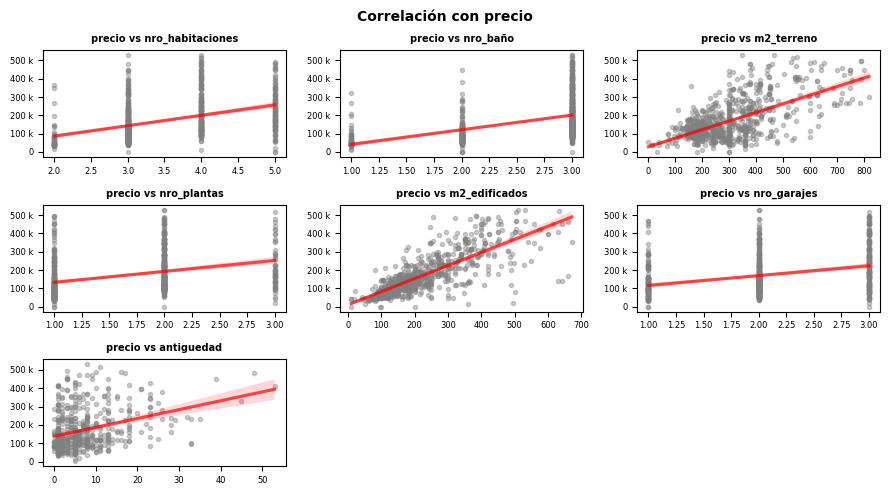

In [30]:
#Al quitar los valores atipicos es posible observar de forma visual sin tener problemas en las escalas
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(9, 5))
axes = axes.flat
for i, colum in enumerate(columns_numeric):
    sns.regplot(
        #x           = np.log(numeric_data[colum]),
        #y           = np.log(numeric_data['precio_venta']),
        x           = var_numx[colum],
        y           = var_numx['precio_venta'],
        color       = "gray",
        marker      = '.',
        scatter_kws = {"alpha":0.4},
        line_kws    = {"color":"r","alpha":0.7},
        ax          = axes[i]
    )
    axes[i].set_title(f"precio vs {colum}", fontsize = 7, fontweight = "bold")
    #axes[i].ticklabel_format(style='sci', scilimits=(-4,4), axis='both')
    axes[i].yaxis.set_major_formatter(ticker.EngFormatter())
    #axes[i].xaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

# Se eliminan los axes vacíos
for i in [7,8]:
    fig.delaxes(axes[i])
    
fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Correlación con precio', fontsize = 10, fontweight = "bold");

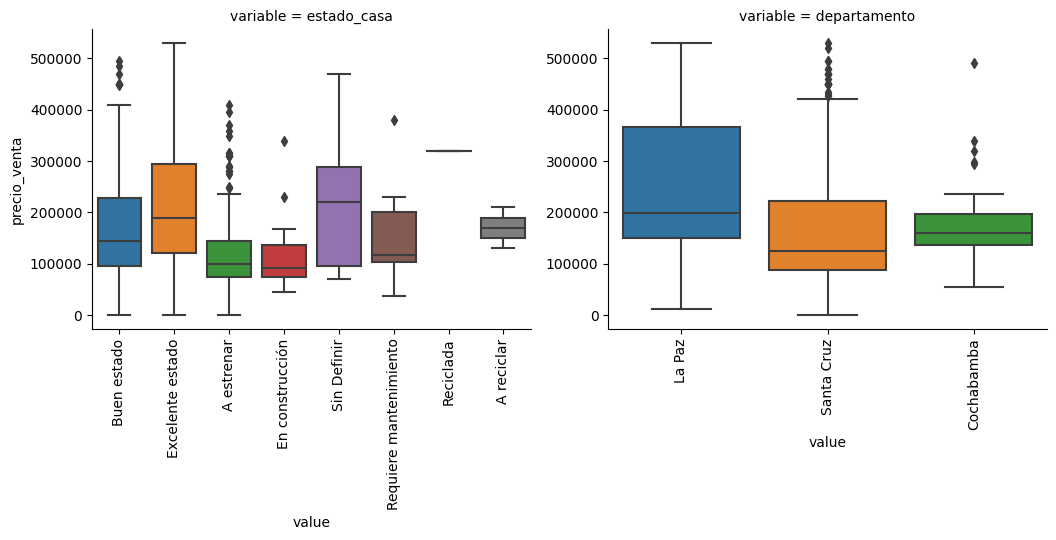

In [31]:
#Al tener muchos valores atipicos, se distorsionaba mucho los boxsplot con las variables categoricas
#Por lo que ahora recien se puede analizar los resultados

def boxplot(x,y,**kwargs):
            sns.boxplot(x=x,y=y)
            x = plt.xticks(rotation=90)

cat = [f for f in df4.columns if df4.dtypes[f] == 'object']

p = pd.melt(df4, id_vars='precio_venta', value_vars=cat)
g = sns.FacetGrid (p, col='variable', col_wrap=2, sharex=False, sharey=False, height=5.5, aspect=.97)
g = g.map(boxplot, 'value','precio_venta')
g

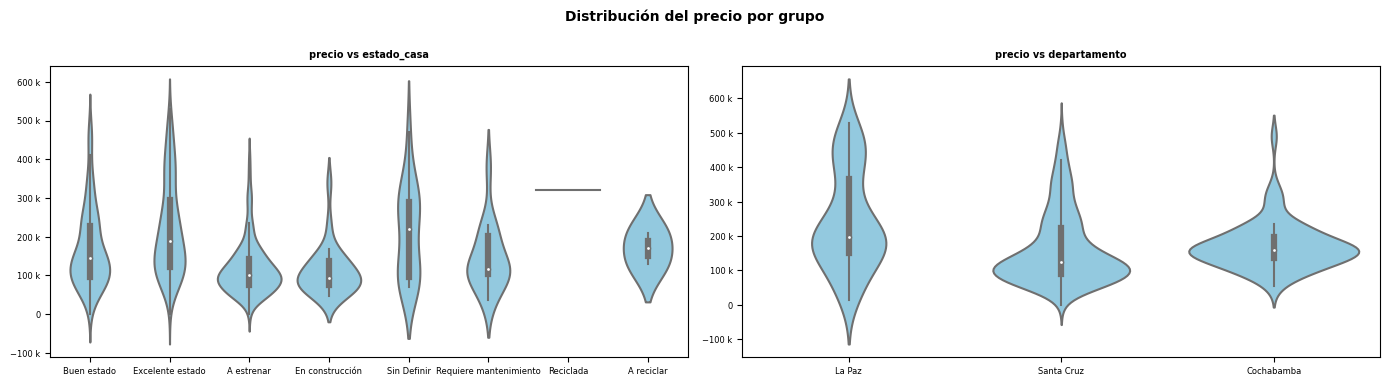

In [32]:
#De la misma manera ahora se puede observar la distiribucion de los datos categoricos en relacion al precio
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 7))
axes = axes.flat
columnas_object = df4.select_dtypes(include=['object']).columns

for i, colum in enumerate(columnas_object):
    sns.violinplot(
        x     = colum,
        y     = 'precio_venta',
        data  = df4,
        color = "skyblue",
        ax    = axes[i]
    )
    axes[i].set_title(f"precio vs {colum}", fontsize = 7, fontweight = "bold")
    axes[i].yaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

# Se eliminan los axes vacíos
for i in [2, 3]:
    fig.delaxes(axes[i])
    
fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Distribución del precio por grupo', fontsize = 10, fontweight = "bold");

## Imputacion de valores ausentes

In [33]:
#Volvemos a calcular para saber si a pesar del analisis de datos atipicos siguen existiendo datos nulos
faltantes = df4.isnull().sum()
faltantes=faltantes[faltantes>0]
faltantes.sort_values(inplace=True)
print(faltantes)

m2_terreno            3
m2_edificados         3
precio_venta          6
nro_habitaciones     12
nro_plantas          41
nro_garajes          56
antiguedad          260
dtype: int64


In [34]:
#Aplicamos Imputación multivariante 
#que usan el conjunto completo de dimensiones de características disponibles para predecir el valor faltante.
df6 =df4.copy()
imp = IterativeImputer(max_iter=10, random_state=0)
df6['precio_venta'] = imp.fit_transform(df6['precio_venta'].values.reshape(-1, 1))
df6['precio_venta'] =df6['precio_venta'].round(2)

df6['m2_terreno'] = imp.fit_transform(df6['m2_terreno'].values.reshape(-1, 1))
df6['m2_terreno'] =df6['m2_terreno'].round(2)

df6['m2_edificados'] = imp.fit_transform(df6['m2_edificados'].values.reshape(-1, 1))
df6['m2_edificados'] =df6['m2_edificados'].round(2)

"""
from sklearn.impute import KNNImputer
imp_knn = KNNImputer(n_neighbors=5, weights="uniform")
df6['antiguedad'] = imp_knn.fit_transform(df6['antiguedad'].values.reshape(-1, 1))
df6['antiguedad'] =df6['antiguedad'].round(2)

from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(strategy='mean')
df6['antiguedad'] = imp_mean.fit_transform(df6['antiguedad'].values.reshape(-1, 1))
"""
df6['antiguedad'] = imp.fit_transform(df6['antiguedad'].values.reshape(-1, 1))
df6['antiguedad'] =df6['antiguedad'].round(2)

#Para estos variables redondeamos a 0 decimales para que no se genere otros valores que no corresponden
df6['nro_habitaciones'] = imp.fit_transform(df6['nro_habitaciones'].values.reshape(-1, 1))
df6['nro_habitaciones'] =df6['nro_habitaciones'].round(0) 

df6['nro_plantas'] = imp.fit_transform(df6['nro_plantas'].values.reshape(-1, 1))
df6['nro_plantas'] = df6['nro_plantas'].round(0)

df6['nro_garajes'] = imp.fit_transform(df6['nro_garajes'].values.reshape(-1, 1))
df6['nro_garajes'] = df6['nro_garajes'].round(0)


faltantes = df6.isnull().sum()
faltantes=faltantes[faltantes>0]
faltantes.sort_values(inplace=True)
print(faltantes)

Series([], dtype: int64)


In [35]:
df6.describe()

nro_habitaciones    nro_baño  m2_terreno  nro_plantas  m2_edificados  \
count        830.000000  830.000000  830.000000   830.000000     830.000000   
mean           3.471084    2.608434  302.684386     1.654217     223.536892   
std            0.794133    0.624916  142.077803     0.615208     120.158147   
min            2.000000    1.000000    2.000000     1.000000      10.000000   
25%            3.000000    2.000000  195.250000     1.000000     135.000000   
50%            3.000000    3.000000  282.500000     2.000000     190.000000   
75%            4.000000    3.000000  371.000000     2.000000     285.000000   
max            5.000000    3.000000  819.000000     3.000000     672.000000   

       nro_garajes   precio_venta  antiguedad  
count   830.000000     830.000000  830.000000  
mean      2.057831  169750.438120    6.723133  
std       0.632097  108523.440208    5.994143  
min       1.000000     145.000000    0.000000  
25%       2.000000   90000.000000    3.000000  
50%       2.000000  135000.000000    6.720000  
75%       2.000000  225000.000000    6.930000  
max       3.000000  530000.000000   53.000000

In [36]:
print(df6[df6.precio_venta < 40000]['precio_venta'].value_counts())
print(df6.shape)

37000.0    2
1000.0     2
38000.0    2
33000.0    2
35200.0    1
36000.0    1
145.0      1
500.0      1
19800.0    1
15500.0    1
38500.0    1
13000.0    1
Name: precio_venta, dtype: int64
(830, 10)


## Separacion de datos de entrenamiento y prueba

In [37]:
df7 = df6.copy()

X_train, X_test, y_train, y_test = train_test_split(
                                        df7.drop('precio_venta', axis = 'columns'),
                                        df7['precio_venta'],
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

In [38]:
print('datos de entrenamiento')
print(X_train.shape)
print(y_train.shape,'\n')
print('datos de prueba')
print(X_test.shape)
print(y_test.shape)

datos de entrenamiento
(664, 9)
(664,) 

datos de prueba
(166, 9)
(166,)


array([[<AxesSubplot: title={'center': 'nro_habitaciones'}>,
        <AxesSubplot: title={'center': 'nro_baño'}>,
        <AxesSubplot: title={'center': 'm2_terreno'}>],
       [<AxesSubplot: title={'center': 'nro_plantas'}>,
        <AxesSubplot: title={'center': 'm2_edificados'}>,
        <AxesSubplot: title={'center': 'nro_garajes'}>],
       [<AxesSubplot: title={'center': 'antiguedad'}>, <AxesSubplot: >,
        <AxesSubplot: >]], dtype=object)

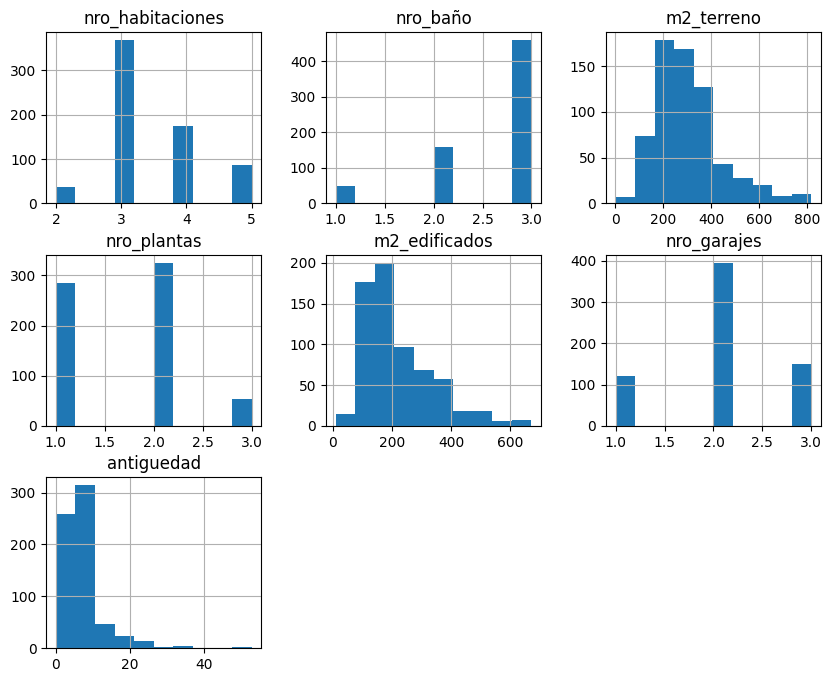

In [39]:
X_train.hist()

array([[<AxesSubplot: title={'center': 'nro_habitaciones'}>,
        <AxesSubplot: title={'center': 'nro_baño'}>,
        <AxesSubplot: title={'center': 'm2_terreno'}>],
       [<AxesSubplot: title={'center': 'nro_plantas'}>,
        <AxesSubplot: title={'center': 'm2_edificados'}>,
        <AxesSubplot: title={'center': 'nro_garajes'}>],
       [<AxesSubplot: title={'center': 'antiguedad'}>, <AxesSubplot: >,
        <AxesSubplot: >]], dtype=object)

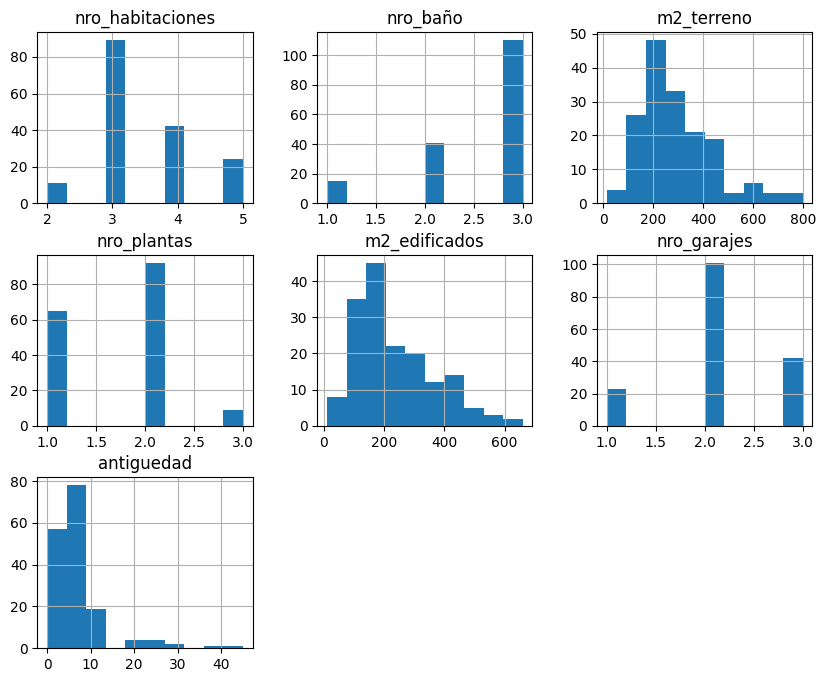

In [40]:
X_test.hist()

## Estandarización y binarización

In [41]:
# Funciones para la identificación de columnas numéricas y categóricas
def colums_nums(dfx):
    res = [f for f in dfx.columns if dfx.dtypes[f] != 'object']
    return res

def colums_objects(dfx):
    res = [f for f in dfx.columns if dfx.dtypes[f] == 'object']
    return res


# Transformaciones para las variables numéricas
numeric_transformer = Pipeline(
                        steps=[('scaler', RobustScaler())]
                      )

# Transformaciones para las variables categóricas
categorical_transformer = Pipeline(
                            steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))]
                          )

preprocessor = ColumnTransformer(
                    transformers=[
                        ('numeric', numeric_transformer, colums_nums(X_train)),
                        ('cat', categorical_transformer, colums_objects(X_train))
                    ],
                    remainder='passthrough'
                )



# Modelos

## KNN

### Entrenamiento y tunning

In [42]:
# Se combinan los pasos de preprocesado y el modelo en un mismo pipeline.
pipe = Pipeline([('preprocessing', preprocessor),
                 ('modelo', KNeighborsRegressor())])
knnInit = pipe.fit(X=X_train, y=y_train)


# Optimización de hiperparámetros
# Espacio de búsqueda de cada hiperparámetro
param_distributions = {'modelo__n_neighbors': np.linspace(1, 100, 500, dtype=int)}

# Búsqueda random grid
grid = RandomizedSearchCV(
        estimator  = pipe,
        param_distributions = param_distributions,
        n_iter     = 20,
        scoring    = 'neg_root_mean_squared_error',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = RepeatedKFold(n_splits = 5, n_repeats = 3), 
        refit      = True, 
        verbose    = 0,
        random_state = 123,
        return_train_score = True
       )

grid.fit(X = X_train, y = y_train)

# Resultados del grid
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)')\
    .drop(columns = 'params')\
    .sort_values('mean_test_score', ascending = False)\
    .head(1)

param_modelo__n_neighbors  mean_test_score  std_test_score  \
5                        26    -61657.907443     4031.560473   

   mean_train_score  std_train_score  
5      -59455.86122      1021.646865

### Evaluación

In [43]:
#Error del test con el modelo incial
predict_knn_1 = knnInit.predict(X_test)
rmse_knn = mean_squared_error(y_true  = y_test, y_pred  = predict_knn_1,squared = False)
mse_knn = mean_squared_error(y_true  = y_test, y_pred  = predict_knn_1,squared = True)
mae_knn = mean_absolute_error(y_true  = y_test, y_pred  = predict_knn_1)

print("Error de test del modelo con los hiperparametros por defecto son:")
print(f"El error (mse) de test es: {mse_knn}")
print(f"El error (rmse) de test es: {rmse_knn}")
print(f"El error (mae) de test es: {mae_knn}")

knn_predicciones_1 = pd.DataFrame({'precio' : y_test, 'prediccion' : predict_knn_1})
knn_predicciones_1.head()

Error de test del modelo con los hiperparametros por defecto son:
El error (mse) de test es: 4388271440.530984
El error (rmse) de test es: 66244.02947082087
El error (mae) de test es: 45379.8273253012


precio  prediccion
414  120000.0    111800.0
939  320000.0    227200.0
368  198000.0    143200.0
297  103000.0    117980.0
457  410000.0    309000.0

In [44]:
#Reentrenamiento
# Error de test del modelo final
modelo_knn_final = grid.best_estimator_
predict_knn_2 = modelo_knn_final.predict(X = X_test)
rmse_knn = mean_squared_error(y_true  = y_test, y_pred  = predict_knn_2,squared = False)
mse_knn = mean_squared_error(y_true  = y_test, y_pred  = predict_knn_2,squared = True)
mae_knn = mean_absolute_error(y_true  = y_test, y_pred  = predict_knn_2)

print("Error de test del modelo re-entrenado con los hiperparametros ideales son:")
print(f"El error (mse) de test es: {mse_knn}")
print(f"El error (rmse) de test es: {rmse_knn}")
print(f"El error (mae) de test es: {mae_knn}")

knn_predicciones_2 = pd.DataFrame({'precio' : y_test, 'prediccion' : predict_knn_2})
knn_predicciones_2.head()

Error de test del modelo re-entrenado con los hiperparametros ideales son:
El error (mse) de test es: 4424029403.409413
El error (rmse) de test es: 66513.37762743232
El error (mae) de test es: 46918.66565338276


precio     prediccion
414  120000.0  100057.692308
939  320000.0  253423.076923
368  198000.0  136730.769231
297  103000.0  105142.307692
457  410000.0  279800.000000

## Regresión lineal Ridge 

### Entrenamiento y tunning

In [45]:
# Se combinan los pasos de preprocesado y el modelo en un mismo pipeline.
pipe = Pipeline([('preprocessing', preprocessor),
                 ('modelo', Ridge())])

ridgeInit= pipe.fit(X=X_train, y=y_train)

# Optimización de hiperparámetros
# Espacio de búsqueda de cada hiperparámetro
param_distributions = {'modelo__alpha': np.logspace(-5, 5, 500)}

# Búsqueda random grid
grid = RandomizedSearchCV(
        estimator  = pipe,
        param_distributions = param_distributions,
        n_iter     = 20,
        scoring    = 'neg_root_mean_squared_error',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = RepeatedKFold(n_splits = 5, n_repeats = 3), 
        refit      = True, 
        verbose    = 0,
        random_state = 123,
        return_train_score = True
       )

grid.fit(X = X_train, y = y_train)

# Resultados del grid
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)')\
    .drop(columns = 'params')\
    .sort_values('mean_test_score', ascending = False)\
    .head(1)

param_modelo__alpha  mean_test_score  std_test_score  mean_train_score  \
4           13.560151    -58074.814941     6319.083107     -56712.366563   

   std_train_score  
4      1568.905378

### Evaluación

In [46]:
#Error del test con el modelo inicial
predict_ridge_1 = ridgeInit.predict(X_test)
rmse_ridge = mean_squared_error(y_true  = y_test, y_pred  = predict_ridge_1,squared = False)
mse_ridge = mean_squared_error(y_true  = y_test, y_pred  = predict_ridge_1,squared = True)
mae_ridge = mean_absolute_error(y_true  = y_test, y_pred  = predict_ridge_1)

print("Error de test del modelo con los hiperparametros por defecto son:")
print(f"El error (mse) de test es: {mse_ridge}")
print(f"El error (rmse) de test es: {rmse_ridge}")
print(f"El error (mae) de test es: {mae_ridge}")

ridge_predicciones_1 = pd.DataFrame({'precio' : y_test, 'prediccion' : predict_ridge_1})
ridge_predicciones_1.head()

Error de test del modelo con los hiperparametros por defecto son:
El error (mse) de test es: 4100303226.305823
El error (rmse) de test es: 64033.610130195084
El error (mae) de test es: 43932.60584947543


precio     prediccion
414  120000.0   86709.515396
939  320000.0  277272.414278
368  198000.0  156225.511794
297  103000.0  125011.391465
457  410000.0  286621.786491

In [47]:
#Reentrenamiento
# Error de test del modelo final
modelo_ridge_final = grid.best_estimator_
predict_ridge_2 = modelo_ridge_final.predict(X = X_test)
rmse_ridge = mean_squared_error(y_true  = y_test, y_pred  = predict_ridge_2,squared = False)
mse_ridge = mean_squared_error(y_true  = y_test, y_pred  = predict_ridge_2,squared = True)
mae_ridge = mean_absolute_error(y_true  = y_test, y_pred  = predict_ridge_2)

print("Error de test del modelo con los hiperparametros ideales son:")
print(f"El error (mse) de test es: {mse_ridge}")
print(f"El error (rmse) de test es: {rmse_ridge}")
print(f"El error (mae) de test es: {mae_ridge}")

ridge_predicciones_2 = pd.DataFrame({'precio' : y_test, 'prediccion' : predict_ridge_2})
ridge_predicciones_2.head()

Error de test del modelo con los hiperparametros ideales son:
El error (mse) de test es: 4054371178.613253
El error (rmse) de test es: 63673.94426775565
El error (mae) de test es: 43398.206987001555


precio     prediccion
414  120000.0   88162.486875
939  320000.0  273787.721643
368  198000.0  154393.582321
297  103000.0  124474.161903
457  410000.0  281180.078330

## Random Forest 

### Entrenamiento y tunning

In [48]:
# Se combinan los pasos de preprocesado y el modelo en un mismo pipeline.
pipe = Pipeline([('preprocessing', preprocessor),
                 ('modelo', RandomForestRegressor())])
randomForestInit = pipe.fit(X=X_train, y=y_train)


# Optimización de hiperparámetros
# Espacio de búsqueda de cada hiperparámetro

param_distributions = {
    'modelo__n_estimators': [50, 100, 1000, 2000],
    'modelo__max_features': ["auto", 3, 5, 7],
    'modelo__max_depth'   : [None, 3, 5, 10, 20]
}

# Búsqueda random grid
grid = RandomizedSearchCV(
        estimator  = pipe,
        param_distributions = param_distributions,
        n_iter     = 20,
        scoring    = 'neg_root_mean_squared_error',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = RepeatedKFold(n_splits = 5, n_repeats = 3),
        refit      = True, 
        verbose    = 0,
        random_state = 123,
        return_train_score = True
       )

grid.fit(X = X_train, y = y_train)

# Resultados del grid
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)')\
    .drop(columns = 'params')\
    .sort_values('mean_test_score', ascending = False)\
    .head(1)

param_modelo__n_estimators param_modelo__max_features  \
12                       2000                          5   

   param_modelo__max_depth  mean_test_score  std_test_score  mean_train_score  \
12                      20    -55341.668426     4423.044425     -20375.859898   

    std_train_score  
12       473.558544

### Evaluación

In [49]:
#Error del test con el modelo incial
predict_RF_1 = randomForestInit.predict(X_test)
rmse_RF = mean_squared_error(y_true  = y_test, y_pred  = predict_RF_1,squared = False)
mse_RF = mean_squared_error(y_true  = y_test, y_pred  = predict_RF_1,squared = True)
mae_RF = mean_absolute_error(y_true  = y_test, y_pred  = predict_RF_1)

print("Error de test del modelo con los hiperparametros por defecto son:")
print(f"El error (mse) de test es: {mse_RF}")
print(f"El error (rmse) de test es: {rmse_RF}")
print(f"El error (mae) de test es: {mae_RF}")

rf_predicciones_1 = pd.DataFrame({'precio' : y_test, 'prediccion' : predict_RF_1})
rf_predicciones_1.head()

Error de test del modelo con los hiperparametros por defecto son:
El error (mse) de test es: 3351540777.2851105
El error (rmse) de test es: 57892.49327231563
El error (mae) de test es: 39139.63631876076


precio   prediccion
414  120000.0  120711.9000
939  320000.0  310935.0088
368  198000.0  122040.0000
297  103000.0  126073.0000
457  410000.0  353430.0000

In [50]:
#Reentrenamiento
# Error de test del modelo final
modelo_RF_final = grid.best_estimator_
predict_RF_2 = modelo_RF_final.predict(X = X_test)
rmse_RF = mean_squared_error(y_true  = y_test, y_pred  = predict_RF_2,squared = False)
mse_RF = mean_squared_error(y_true  = y_test, y_pred  = predict_RF_2,squared = True)
mae_RF = mean_absolute_error(y_true  = y_test, y_pred  = predict_RF_2)

print("Error de test del modelo con los hiperparametros ideales son:")
print(f"El error (mse) de test es: {mse_RF}")
print(f"El error (rmse) de test es: {rmse_RF}")
print(f"El error (mae) de test es: {mae_RF}")

rf_predicciones_2 = pd.DataFrame({'precio' : y_test, 'prediccion' : predict_RF_2})
rf_predicciones_2.head()

Error de test del modelo con los hiperparametros ideales son:
El error (mse) de test es: 3024249933.621056
El error (rmse) de test es: 54993.18079199507
El error (mae) de test es: 36877.269572297955


precio     prediccion
414  120000.0  114607.343180
939  320000.0  290473.653080
368  198000.0  128493.293530
297  103000.0  122283.812582
457  410000.0  298278.700440

## Gradient Boosting Trees

### Entrenamiento y tunning

In [51]:
# Se combinan los pasos de preprocesado y el modelo en un mismo pipeline.
pipe = Pipeline([('preprocessing', preprocessor),
                 ('modelo', GradientBoostingRegressor())])

gbInit = pipe.fit(X=X_train, y=y_train)

# Optimización de hiperparámetros
# Espacio de búsqueda de cada hiperparámetro

param_distributions = {
    'modelo__n_estimators': [50, 100, 1000, 2000],
    'modelo__max_features': ["auto", 3, 5, 7],
    'modelo__max_depth'   : [None, 3, 5, 10, 20],
    'modelo__subsample'   : [0.5,0.7, 1]
}

# Búsqueda random grid
grid = RandomizedSearchCV(
        estimator  = pipe,
        param_distributions = param_distributions,
        n_iter     = 20,
        scoring    = 'neg_root_mean_squared_error',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = RepeatedKFold(n_splits = 5, n_repeats = 3),
        refit      = True, 
        verbose    = 0,
        random_state = 123,
        return_train_score = True
       )

grid.fit(X = X_train, y = y_train)

# Resultados del grid
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)')\
    .drop(columns = 'params')\
    .sort_values('mean_test_score', ascending = False)\
    .head(1)

param_modelo__subsample param_modelo__n_estimators  \
14                       1                        100   

   param_modelo__max_features param_modelo__max_depth  mean_test_score  \
14                          7                       3    -56162.741971   

    std_test_score  mean_train_score  std_train_score  
14     3580.040083     -36155.776472       820.345973

### Evaluación

In [52]:
#Error del test con el modelo incial
predict_gbr_1 = gbInit.predict(X_test)
rmse_gbr = mean_squared_error(y_true  = y_test, y_pred  = predict_gbr_1,squared = False)
mse_gbr = mean_squared_error(y_true  = y_test, y_pred  = predict_gbr_1,squared = True)
mae_gbr = mean_absolute_error(y_true  = y_test, y_pred  = predict_gbr_1)

print("Error de test del modelo con los hiperparametros por defecto son:")
print(f"El error (mse) de test es: {mse_gbr}")
print(f"El error (rmse) de test es: {rmse_gbr}")
print(f"El error (mae) de test es: {mae_gbr}")

gbr_predicciones_1 = pd.DataFrame({'precio' : y_test, 'prediccion' : predict_gbr_1})
gbr_predicciones_1.head()

Error de test del modelo con los hiperparametros por defecto son:
El error (mse) de test es: 3173194155.7582607
El error (rmse) de test es: 56331.11179231474
El error (mae) de test es: 40809.497379765126


precio     prediccion
414  120000.0  101133.119036
939  320000.0  276245.681637
368  198000.0  113058.659729
297  103000.0  125751.818996
457  410000.0  349576.515103

In [53]:
#Reentrenamiento
# Error de test del modelo final
modelo_gbr_final = grid.best_estimator_
predict_gbr_2 = modelo_gbr_final.predict(X = X_test)
rmse_gbr = mean_squared_error(y_true  = y_test, y_pred  = predict_gbr_2,squared = False)
mse_gbr = mean_squared_error(y_true  = y_test, y_pred  = predict_gbr_2,squared = True)
mae_gbr = mean_absolute_error(y_true  = y_test, y_pred  = predict_gbr_2)

print("Error de test del modelo con los hiperparametros ideales son:")
print(f"El error (mse) de test es: {mse_gbr}")
print(f"El error (rmse) de test es: {rmse_gbr}")
print(f"El error (mae) de test es: {mae_gbr}")

rf_predicciones_2 = pd.DataFrame({'precio' : y_test, 'prediccion' : predict_gbr_2})
rf_predicciones_2.head()

Error de test del modelo con los hiperparametros ideales son:
El error (mse) de test es: 3138294884.6793265
El error (rmse) de test es: 56020.48629456305
El error (mae) de test es: 39509.875931383125


precio     prediccion
414  120000.0  107133.290041
939  320000.0  265090.716398
368  198000.0  114007.207409
297  103000.0  126185.156917
457  410000.0  345994.207145

## Comparación de resultados entre modelos

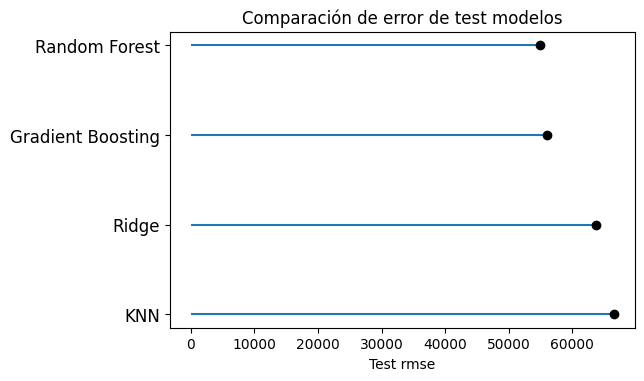

In [54]:
error_modelos = pd.DataFrame({
                        'modelo': ['KNN', 'Ridge', 'Random Forest', 'Gradient Boosting'],
                        'rmse': [rmse_knn, rmse_ridge, rmse_RF, rmse_gbr]
                     })
error_modelos = error_modelos.sort_values('rmse', ascending=False)

fig, ax = plt.subplots(figsize=(6, 3.84))
ax.hlines(error_modelos.modelo, xmin=0, xmax=error_modelos.rmse)
ax.plot(error_modelos.rmse, error_modelos.modelo, "o", color='black')
ax.tick_params(axis='y', which='major', labelsize=12)
ax.set_title('Comparación de error de test modelos'),
ax.set_xlabel('Test rmse');

# Prueba

In [55]:
print('Precio de venta - datos descriptivos:')
print('valor maximo:',data_clean['precio_venta'].max())
print('valor minimo:',data_clean['precio_venta'].min())
print('Media:',data_clean['precio_venta'].mean())
print('std:',data_clean['precio_venta'].std())
print('Mediana',data_clean['precio_venta'].median())
print('Q1: ',np.nanpercentile(data_clean['precio_venta'], 25,method='midpoint'))
print('Q3:',np.nanpercentile(data_clean['precio_venta'], 75,method='midpoint'))

Precio de venta - datos descriptivos:
valor maximo: 123456789.0
valor minimo: 145.0
Media: 364118.78
std: 3907111.6212483756
Mediana 149000.0
Q1:  95000.0
Q3: 272500.0


In [56]:
#Para observar valores segun criterio
print(var_num[var_num.antiguedad > 12]['antiguedad'].value_counts())

13.0    31
18.0    16
23.0    14
15.0     7
21.0     7
28.0     6
16.0     5
33.0     5
14.0     4
17.0     4
26.0     3
25.0     3
20.0     2
43.0     2
45.0     1
30.0     1
32.0     1
35.0     1
53.0     1
29.0     1
22.0     1
39.0     1
48.0     1
Name: antiguedad, dtype: int64


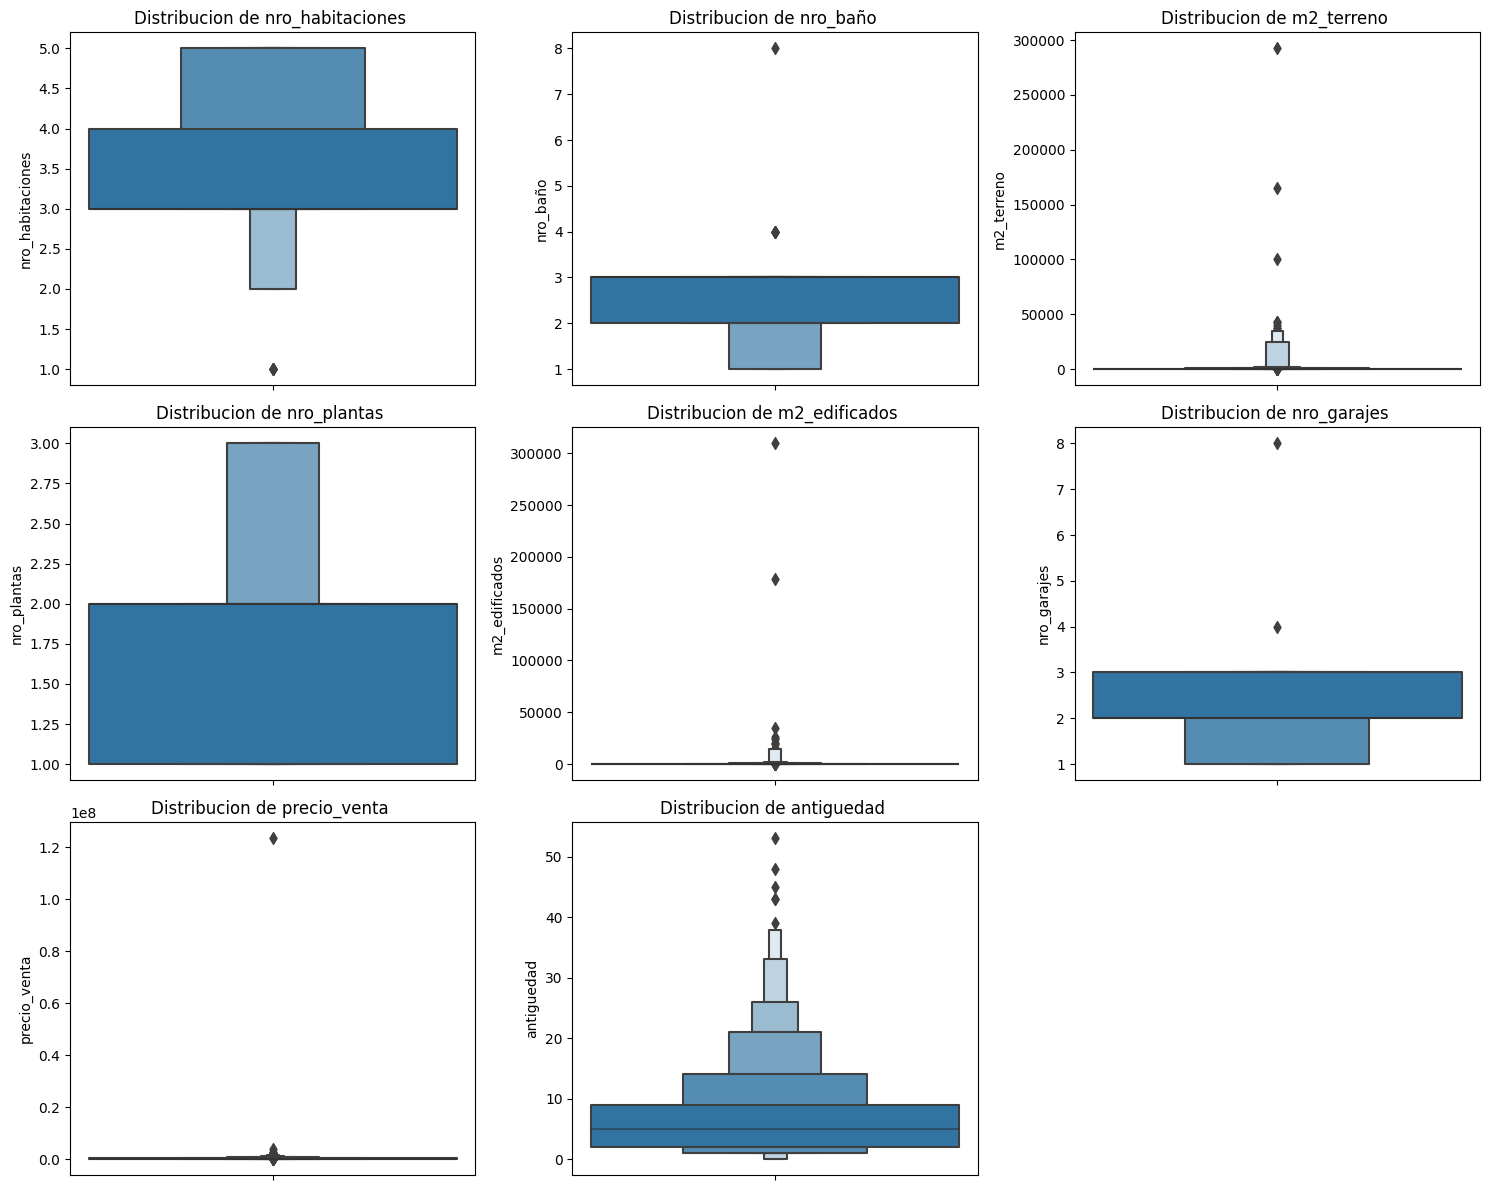

In [57]:
#Distribucion de las variables por medio de boxenplot
var_num=numeric_data.drop(columns=['index'])
#var_num = var_num.reset_index()
cols=3
rows=math.ceil(len(var_num.columns)/cols)
plt.figure(figsize=(15,rows*4))

for i,col in enumerate(var_num,1):
    plt.subplot(rows,cols,i)
    plt.title(f"Distribucion de {col} ")
    #sns.boxenplot(y=np.log(var_num[col]),width=0.6)
    sns.boxenplot(y=var_num[col],width=0.6)
    plt.tight_layout()
    plt.plot()

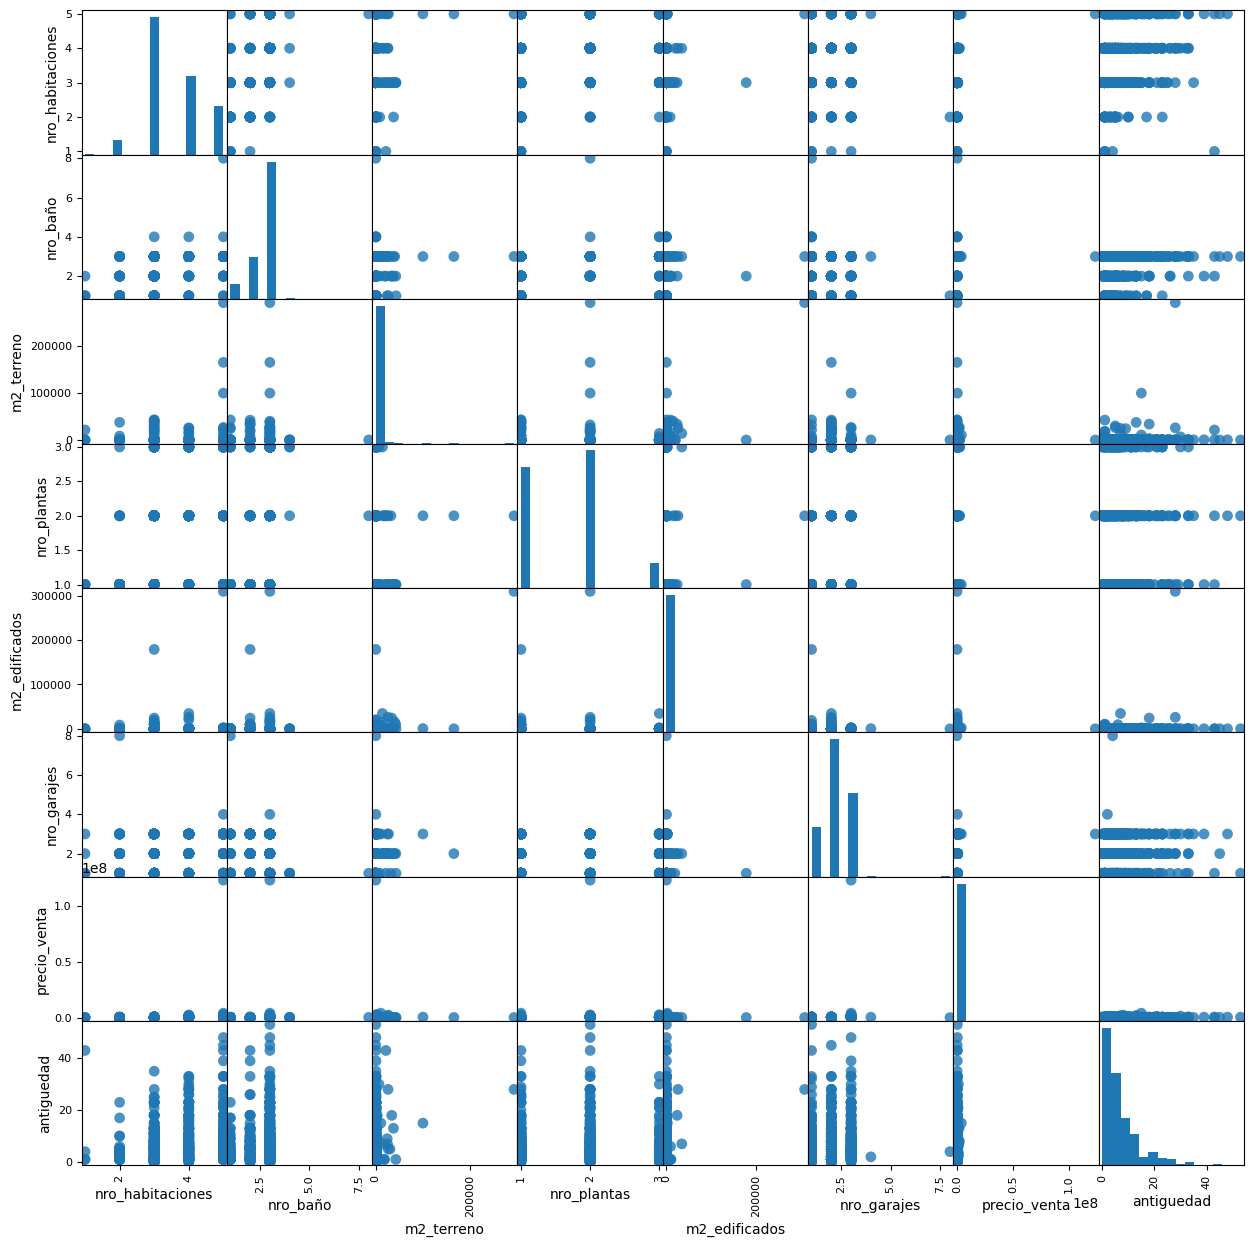

In [58]:
#Matriz de graficas de dispersion entre todas las variables numericas
pd.plotting.scatter_matrix(var_num, figsize=(15,15), marker = 'o', hist_kwds = {'bins': 15}, s = 60, alpha = 0.8)
plt.show()

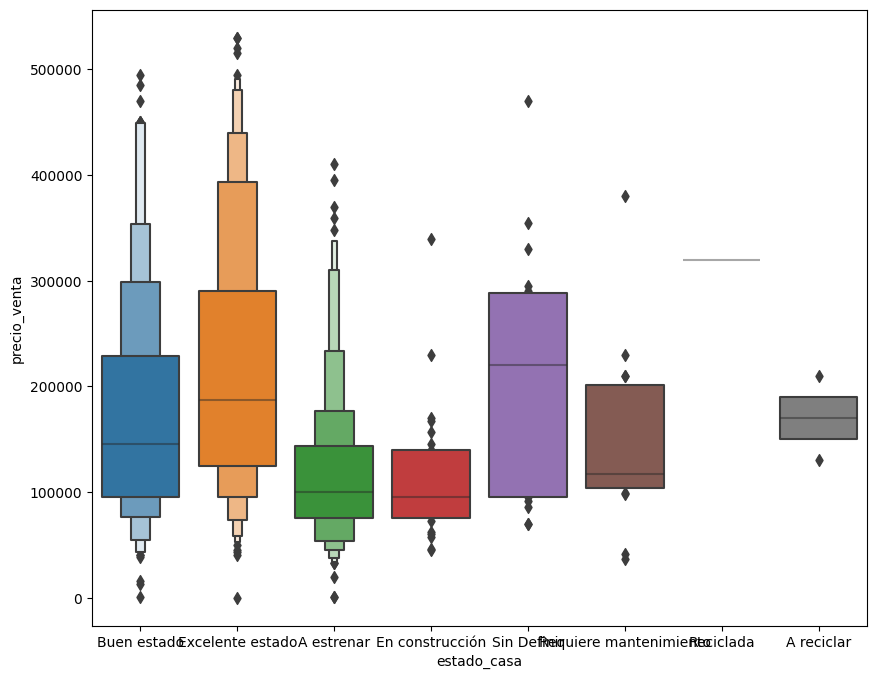

In [59]:
sns.boxenplot(y="precio_venta",x='estado_casa',data=df6)
plt.show()

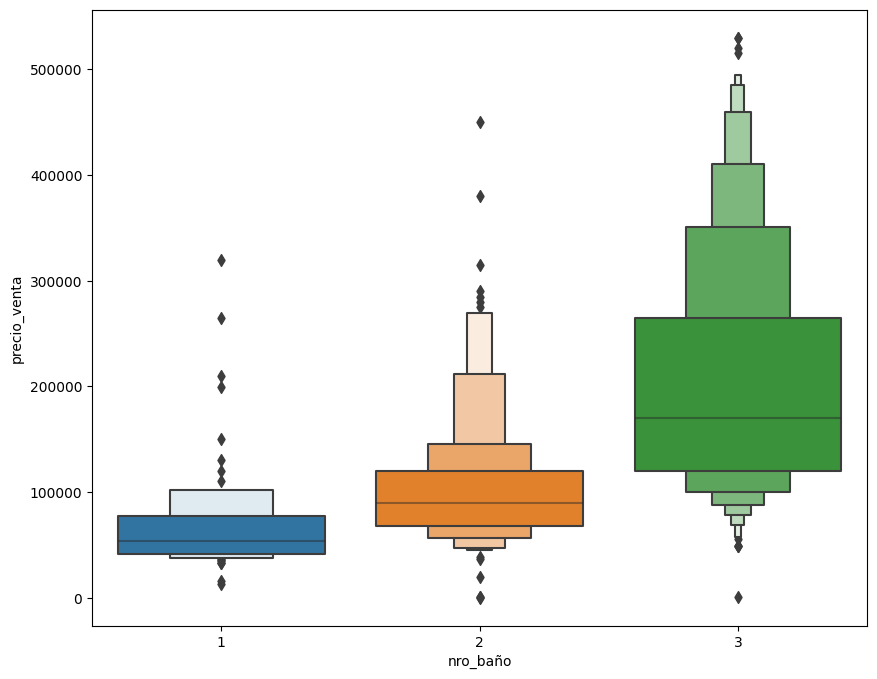

In [60]:
sns.boxenplot(y="precio_venta",x='nro_baño',data=df6)
plt.show()

c:\ProgramData\Anaconda3\envs\l1mk\lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


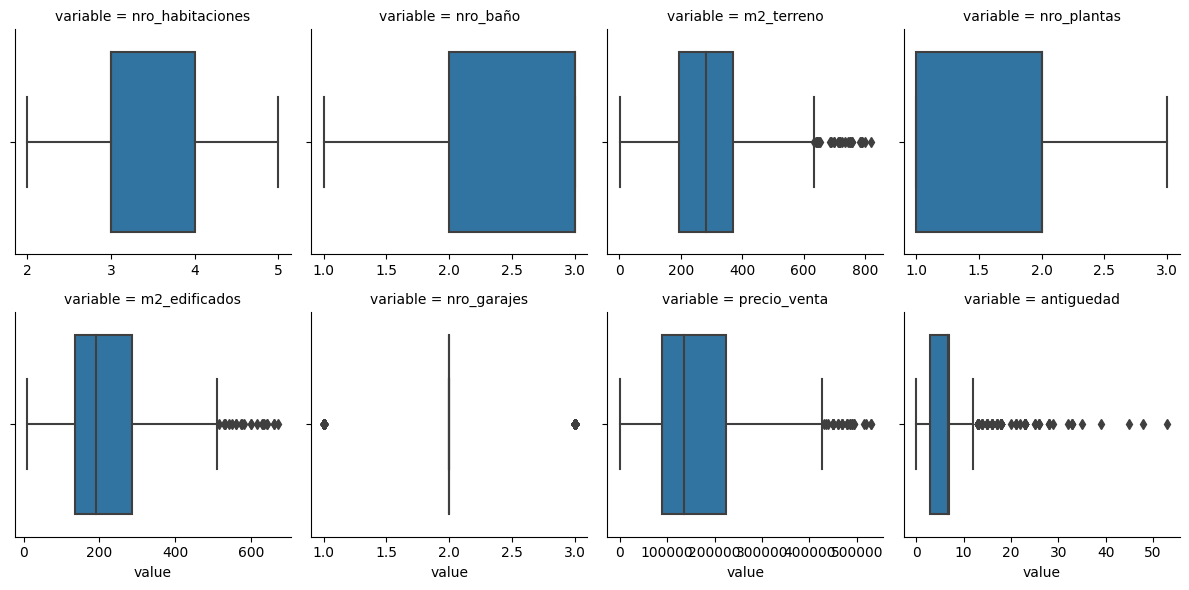

In [61]:
boxsplotsCasas(df6)

## Escalamiento

In [62]:
#Funciones para obtener lista de variables numericas y object
def colums_nums(dfx):
    res = [f for f in dfx.columns if dfx.dtypes[f] != 'object']
    return res

def colums_objects(dfx):
    res = [f for f in dfx.columns if dfx.dtypes[f] == 'object']
    return res

In [63]:
#minmax
df7_1 =df6.copy()
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
colnums=colums_nums(df7_1)
df7_1[colnums] = scaler.fit_transform(df7_1[colnums])
df7_1[colnums].head()

nro_habitaciones  nro_baño  m2_terreno  nro_plantas  m2_edificados  \
2          0.333333       1.0    0.784578          0.0       0.956193   
3          1.000000       0.5    0.235006          0.0       0.277946   
4          0.666667       1.0    0.190942          0.5       0.223565   
5          0.666667       1.0    0.714810          0.0       0.563444   
7          1.000000       1.0    0.514076          0.5       0.442598   

   nro_garajes  precio_venta  antiguedad  
2          1.0      0.847128    0.126792  
3          0.5      0.262062    0.126792  
4          0.0      0.280935    0.126792  
5          0.5      0.764086    0.126792  
7          0.5      0.396061    0.126792

array([[<AxesSubplot: title={'center': 'nro_habitaciones'}>,
        <AxesSubplot: title={'center': 'nro_baño'}>,
        <AxesSubplot: title={'center': 'm2_terreno'}>],
       [<AxesSubplot: title={'center': 'nro_plantas'}>,
        <AxesSubplot: title={'center': 'm2_edificados'}>,
        <AxesSubplot: title={'center': 'nro_garajes'}>],
       [<AxesSubplot: title={'center': 'precio_venta'}>,
        <AxesSubplot: title={'center': 'antiguedad'}>, <AxesSubplot: >]],
      dtype=object)

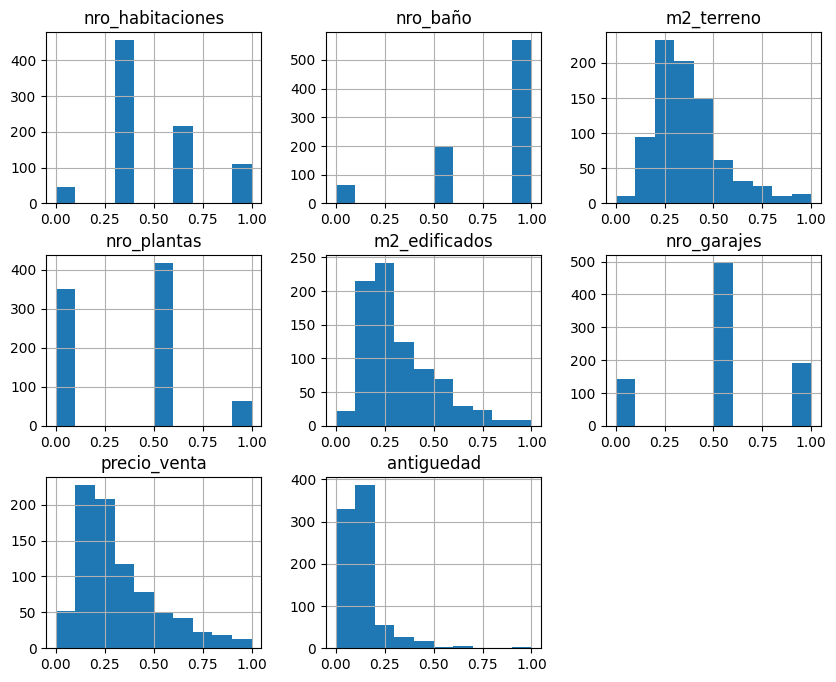

In [64]:
df7_1[colnums].hist()

### Estandarizacion (desv_std = 1, media = 0)

In [65]:
# estandarizado = (X - media) / std
#datos mas distribuidos
df7_2 =df6.copy()
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
colnums=colums_nums(df7_2)
df7_2[colnums] = scaler.fit_transform(df7_2[colnums])
df7_2[colnums].head()

nro_habitaciones  nro_baño  m2_terreno  nro_plantas  m2_edificados  \
2         -0.593564  0.626968    2.396721    -1.064049       3.493030   
3          1.926426 -0.974212   -0.765425    -1.064049      -0.245965   
4          0.666431  0.626968   -1.018960     0.562398      -0.545751   
5          0.666431  0.626968    1.995290    -1.064049       1.327910   
7          1.926426  0.626968    0.840297     0.562398       0.661720   

   nro_garajes  precio_venta  antiguedad  
2     1.491443      2.574724   -0.000523  
3    -0.091546     -0.283524   -0.000523  
4    -1.674536     -0.191322   -0.000523  
5    -0.091546      2.169037   -0.000523  
7    -0.091546      0.371107   -0.000523

array([[<AxesSubplot: title={'center': 'nro_habitaciones'}>,
        <AxesSubplot: title={'center': 'nro_baño'}>,
        <AxesSubplot: title={'center': 'm2_terreno'}>],
       [<AxesSubplot: title={'center': 'nro_plantas'}>,
        <AxesSubplot: title={'center': 'm2_edificados'}>,
        <AxesSubplot: title={'center': 'nro_garajes'}>],
       [<AxesSubplot: title={'center': 'precio_venta'}>,
        <AxesSubplot: title={'center': 'antiguedad'}>, <AxesSubplot: >]],
      dtype=object)

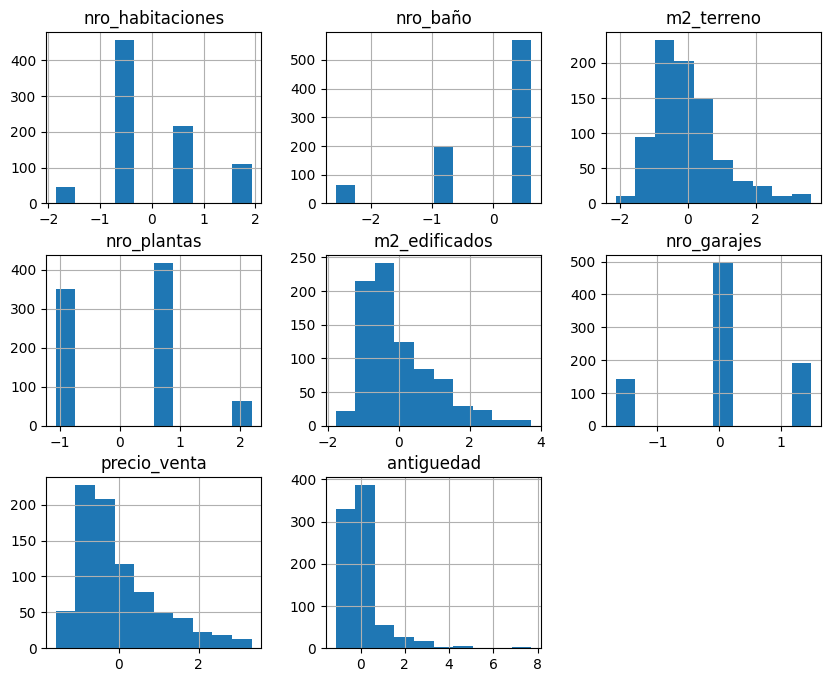

In [66]:
df7_2[colnums].hist()

In [67]:
# estandarizado = (X - rango_intercuartílico) / std
#datos menos distribuidos
#La distribucion de los datos no es afectada por los datos atipicos
df7_3 =df6.copy()
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
colnums=colums_nums(df7_3)
df7_3[colnums] = scaler.fit_transform(df7_3[colnums])
df7_3[colnums].head()

nro_habitaciones  nro_baño  m2_terreno  nro_plantas  m2_edificados  \
2               0.0       0.0    2.051209         -1.0       3.020000   
3               2.0      -1.0   -0.503556         -1.0       0.026667   
4               1.0       0.0   -0.708393          0.0      -0.213333   
5               1.0       0.0    1.726885         -1.0       1.286667   
7               2.0       0.0    0.793741          0.0       0.753333   

   nro_garajes  precio_venta  antiguedad  
2          1.0      2.325926         0.0  
3          0.0      0.029630         0.0  
4         -1.0      0.103704         0.0  
5          0.0      2.000000         0.0  
7          0.0      0.555556         0.0

array([[<AxesSubplot: title={'center': 'nro_habitaciones'}>,
        <AxesSubplot: title={'center': 'nro_baño'}>,
        <AxesSubplot: title={'center': 'm2_terreno'}>],
       [<AxesSubplot: title={'center': 'nro_plantas'}>,
        <AxesSubplot: title={'center': 'm2_edificados'}>,
        <AxesSubplot: title={'center': 'nro_garajes'}>],
       [<AxesSubplot: title={'center': 'precio_venta'}>,
        <AxesSubplot: title={'center': 'antiguedad'}>, <AxesSubplot: >]],
      dtype=object)

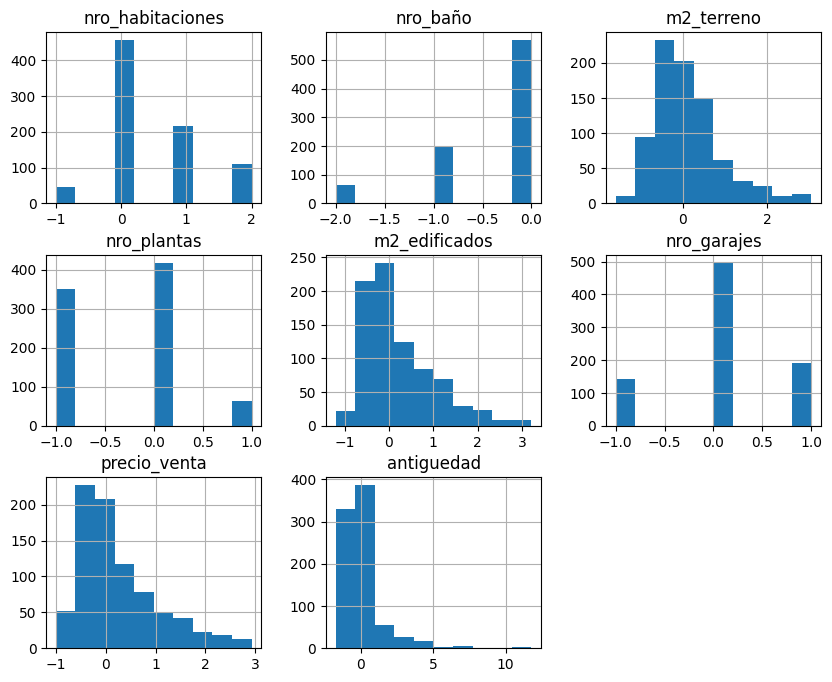

In [68]:
df7_3[colnums].hist()

## Binarización de variables cualitativas

## Exclusión de variables con varianza próxima a cero

In [69]:
from sklearn.feature_selection import VarianceThreshold
df7 = df6.copy()
var_numx2 = var_nums(df7)
print(var_numx2.shape)
selector = VarianceThreshold()
print((selector.fit_transform(var_numx2)).shape)

(830, 8)
(830, 8)
